<a href="https://colab.research.google.com/github/kushagra67414/python/blob/master/Photograph_and_Paintings_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

for root, dirs, files in os.walk("/content/drive/MyDrive/dl_datasets"):
    print(f"There are {len(dirs)} directories and {len(files)} files in {root}")

There are 2 directories and 0 files in /content/drive/MyDrive/dl_datasets
There are 2 directories and 0 files in /content/drive/MyDrive/dl_datasets/train
There are 0 directories and 3513 files in /content/drive/MyDrive/dl_datasets/train/painting
There are 0 directories and 3528 files in /content/drive/MyDrive/dl_datasets/train/photos
There are 2 directories and 0 files in /content/drive/MyDrive/dl_datasets/valid
There are 0 directories and 1505 files in /content/drive/MyDrive/dl_datasets/valid/painting
There are 0 directories and 1505 files in /content/drive/MyDrive/dl_datasets/valid/photos


In [3]:
import numpy as np

class_names = np.array(sorted(os.listdir('/content/drive/MyDrive/dl_datasets/train')))
class_names

array(['painting', 'photos'], dtype='<U8')

In [4]:
import random
import matplotlib.pyplot as plt

def plot_random_image(directory, class_names):
    """
    To plot 1 random image from all the classes of the directory specified
    """

    plt.figure(figsize=(10,10))

    total = len(class_names)
    for i in range(total):
        image_path = directory + "/" + class_names[i]
        random_image = random.sample(os.listdir(image_path), 1)
        image_path = image_path + "/" + random_image[0]
        image = plt.imread(image_path)

        plt.subplot(1, total, (i+1))
        plt.imshow(image)
        plt.axis(False)
        plt.title(f"{class_names[i]}", fontsize=20)

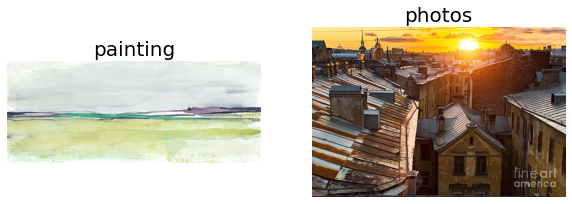

In [5]:
# plotting random images from train dataset

plot_random_image(directory = "/content/drive/MyDrive/dl_datasets/train", class_names = class_names)

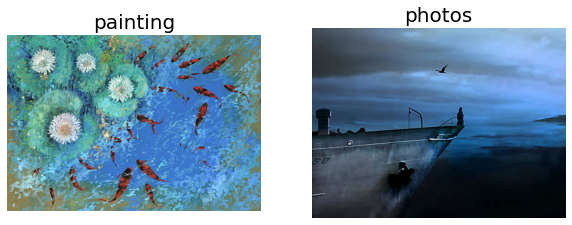

In [6]:
# plotting random images from train dataset

plot_random_image(directory = "/content/drive/MyDrive/dl_datasets/train", class_names = class_names)

In [7]:
random_image = random.sample(os.listdir("/content/drive/MyDrive/dl_datasets/train/painting"), 1)
image = plt.imread("/content/drive/MyDrive/dl_datasets/train/painting" + "/" + random_image[0])
print(image.shape)
print("Max: ", image.max()) 
print("Min: " ,image.min())

(400, 400, 3)
Max:  255
Min:  0


In [8]:
random_image = random.sample(os.listdir("/content/drive/MyDrive/dl_datasets/train/photos"), 1)
image = plt.imread("/content/drive/MyDrive/dl_datasets/train/photos" + "/" + random_image[0])
print(image.shape)
print("Max: ", image.max()) 
print("Min: " ,image.min())

(269, 400, 3)
Max:  255
Min:  0


In [9]:
# PREPARING  THE DATA FOR THE MODEL

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Setting random seed
tf.random.set_seed(42)


# Storing train, test and validation dataset directory
train_dir = "/content/drive/MyDrive/dl_datasets/train"
valid_dir = "/content/drive/MyDrive/dl_datasets/valid"


# Instantiating the ImageDataGenerator for train, test and validation dataset
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=20,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale=1/255.)


# Getting data from DataGenerator
train_data = train_datagen.flow_from_directory(directory=  train_dir,
                                               target_size= (512, 512),
                                               class_mode= 'binary',
                                               batch_size= 32,
                                               shuffle= True,
                                            #    seed= 42
                                               )

valid_data = valid_datagen.flow_from_directory(directory=  valid_dir,
                                               target_size= (512, 512),
                                               class_mode= 'binary',
                                               batch_size= 32,
                                               shuffle= True,
                                            #    seed= 42
                                               )

Found 7041 images belonging to 2 classes.
Found 3010 images belonging to 2 classes.


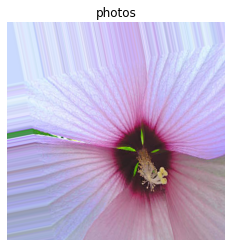

In [12]:
images, labels = train_data.next()
random_number = random.sample(range(len(images)), 1)[0]
plt.imshow(images[random_number])
plt.title(class_names[int(labels[random_number])])
plt.axis(False);

In [13]:
# Creating a model and finding a good learning rate

In [14]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

In [15]:
INPUT_SHAPE = (512, 512, 3)

In [16]:
base_model = inception_resnet_v2 = tf.keras.applications.InceptionResNetV2(
    include_top = False, 
    weights = 'imagenet', 
    input_tensor = None,
    input_shape = INPUT_SHAPE, 
    pooling = None, 
    classes = 1000
)

219070464/219055592 [==============================] - 2s 0us/step


In [17]:
base_model.trainable=False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(512,512,3), name="input_layer")
x = base_model(inputs, training=False) #Put the base model in inference mode, and so weights ehich remains frozen, remains frozen
x = layers.Conv2D(64, (3, 3), activation = 'relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

In [18]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 12.9 MB/s 


In [19]:
import tensorflow_addons as tfa
model.compile(loss ='binary_crossentropy', 
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), 
              metrics = ["accuracy"])

In [20]:
valid_data

In [21]:
history = model.fit(train_data,
                                           epochs=10,
                                           steps_per_epoch=len(train_data),
                                           validation_data=valid_data,
                                           validation_steps=len(valid_data))

Epoch 1/10
221/221 [==============================] - 5160s 23s/step - loss: 0.4004 - accuracy: 0.8162 - val_loss: 0.3326 - val_accuracy: 0.8638
Epoch 2/10
221/221 [==============================] - 811s 4s/step - loss: 0.2933 - accuracy: 0.8855 - val_loss: 0.2858 - val_accuracy: 0.8850
Epoch 3/10
221/221 [==============================] - 812s 4s/step - loss: 0.2550 - accuracy: 0.9021 - val_loss: 0.2941 - val_accuracy: 0.8884
Epoch 4/10
221/221 [==============================] - 811s 4s/step - loss: 0.2358 - accuracy: 0.9097 - val_loss: 0.2472 - val_accuracy: 0.9130
Epoch 5/10
221/221 [==============================] - 808s 4s/step - loss: 0.2116 - accuracy: 0.9175 - val_loss: 0.2583 - val_accuracy: 0.9030
Epoch 6/10
221/221 [==============================] - 809s 4s/step - loss: 0.2018 - accuracy: 0.9220 - val_loss: 0.2330 - val_accuracy: 0.9136
Epoch 7/10
221/221 [==============================] - 806s 4s/step - loss: 0.1832 - accuracy: 0.9331 - val_loss: 0.2315 - val_accuracy: 0.90

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 512, 512, 3)]     0         
_________________________________________________________________
inception_resnet_v2 (Functio (None, 14, 14, 1536)      54336736  
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 12, 12, 64)        884800    
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 9217      
Total params: 55,230,753
Trainable params: 894,017
Non-trainable params: 54,336,736
_________________________________________________________________


In [23]:
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 255, 255, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 255, 255, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 255, 255, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

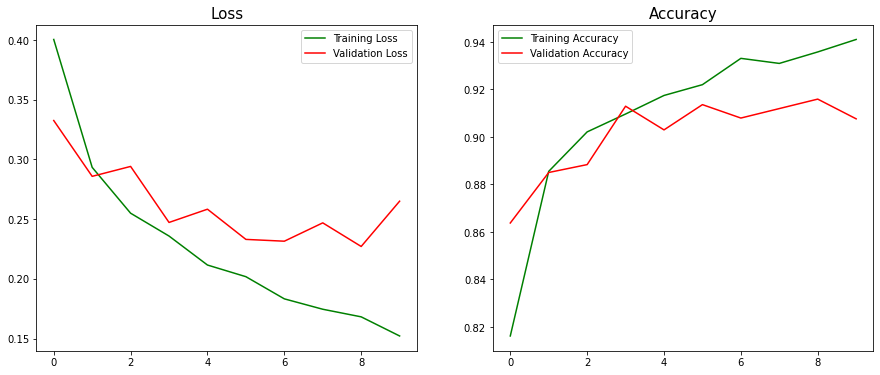

In [24]:
loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

epochs = range(len(loss))

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(epochs, loss, label = "Training Loss", color='green')
plt.plot(epochs, val_loss, label = "Validation Loss", color='red')
plt.legend()
plt.title("Loss", fontsize=15)

plt.subplot(1,2,2)
plt.plot(epochs, accuracy, label = "Training Accuracy", color='green')
plt.plot(epochs, val_accuracy, label = "Validation Accuracy", color='red')
plt.legend()
plt.title("Accuracy", fontsize=15)
plt.show();

In [26]:
evaluation_result = model.evaluate(valid_data)

95/95 [==============================] - 207s 2s/step - loss: 0.2650 - accuracy: 0.9076


In [27]:

evaluation_result

[0.2650068700313568, 0.9076411724090576]

In [28]:

class_names

array(['painting', 'photos'], dtype='<U8')

In [29]:
pred_probs = model.predict(valid_data)
pred_probs

array([[2.1439484e-01],
       [8.6209708e-04],
       [8.1283869e-03],
       ...,
       [9.8555745e-04],
       [9.9716252e-01],
       [5.5631310e-02]], dtype=float32)

In [30]:

pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
len(pred_classes)

3010

In [34]:
len(y_labels)


0

In [37]:
predgen = model.predict_generator(valid_data, steps=len(valid_data))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [38]:
predgen

array([[9.9962008e-01],
       [2.7680196e-06],
       [9.7169060e-01],
       ...,
       [9.9824870e-01],
       [9.9215513e-01],
       [2.0791949e-03]], dtype=float32)

In [39]:
preds_ = np.ravel(np.round(predgen)).astype(int)
preds_

array([1, 0, 1, ..., 1, 1, 0])

In [40]:
valid_data.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [41]:
valid_data.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [45]:
print(confusion_matrix(valid_data.classes, preds_))

[[819 686]
 [832 673]]


In [46]:
print(confusion_matrix(valid_data.labels, preds_))

[[819 686]
 [832 673]]


In [47]:
print(classification_report(valid_data.classes, preds_, target_names = class_names))

              precision    recall  f1-score   support

    painting       0.50      0.54      0.52      1505
      photos       0.50      0.45      0.47      1505

    accuracy                           0.50      3010
   macro avg       0.50      0.50      0.49      3010
weighted avg       0.50      0.50      0.49      3010



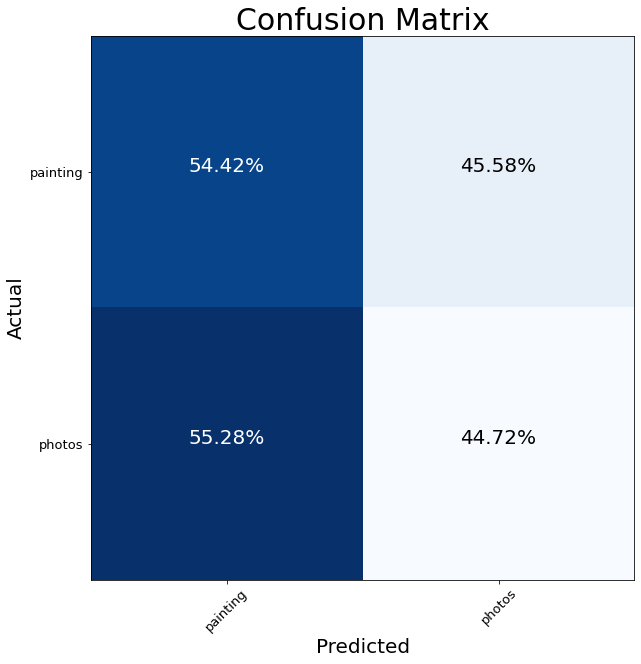

In [58]:
cm = confusion_matrix(valid_data.labels, preds_)
cm = cm.astype(float) / cm.sum(axis=1)[: np.newaxis]
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap="Blues")
plt.xticks(np.arange(len(class_names)), class_names, rotation=45, fontsize=13)
plt.yticks(np.arange(len(class_names)), class_names, fontsize=13)
plt.xlabel("Predicted", fontsize =20)
plt.ylabel("Actual", fontsize =20)
plt.title("Confusion Matrix", fontsize=30)
for i in range(2):
    for j in range(2):
       plt.text(i,j, f"{cm[j,i]*100:.2f}%",  horizontalalignment='center', 
                                fontsize=20,
                                color="white" if cm[j,i]>0.5 else "black")

In [61]:
valid_data

In [62]:
len(valid_data)

95

In [63]:
95*32

3040

In [66]:
y_lables = []

for i in range(len(valid_data)):
  im, lab = valid_data.next()
  y_labels.extend(lab)

In [67]:
len(y_labels)

3010

In [77]:
import numpy as np

y_labels=np.array(y_labels, dtype=np.int32 )

In [78]:
y_labels[:5]

array([1, 0, 0, 0, 1], dtype=int32)

In [79]:
preds_[:5]

array([1, 0, 1, 1, 0])

In [80]:
preds_=np.array(preds_)

In [81]:
preds_[:5]

array([1, 0, 1, 1, 0])

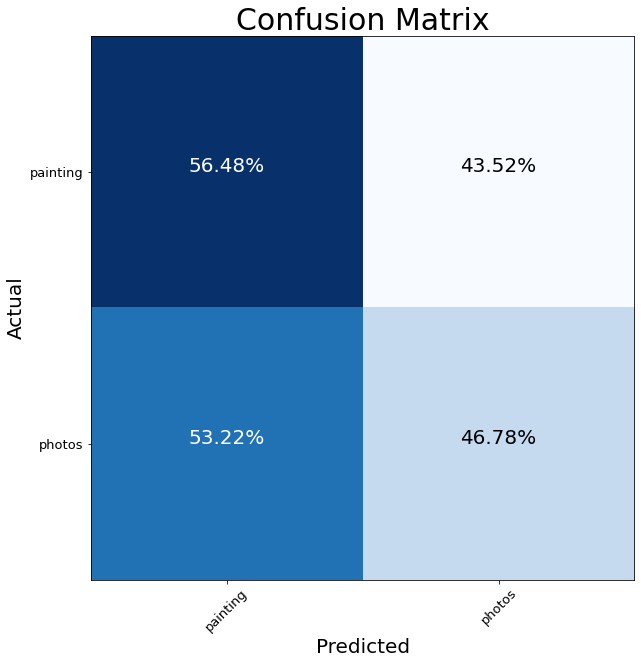

In [83]:
cm = confusion_matrix(y_labels, preds_)
cm = cm.astype(float) / cm.sum(axis=1)[: np.newaxis]
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap="Blues")
plt.xticks(np.arange(len(class_names)), class_names, rotation=45, fontsize=13)
plt.yticks(np.arange(len(class_names)), class_names, fontsize=13)
plt.xlabel("Predicted", fontsize =20)
plt.ylabel("Actual", fontsize =20)
plt.title("Confusion Matrix", fontsize=30)
for i in range(2):
    for j in range(2):
       plt.text(i,j, f"{cm[j,i]*100:.2f}%",  horizontalalignment='center', 
                                fontsize=20,
                                color="white" if cm[j,i]>0.5 else "black")

In [85]:
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'f1-score': 0.6666666666666666,
  'precision': 0.5,
  'recall': 1.0,
  'support': 1505},
 '1': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 1505},
 'accuracy': 0.5,
 'macro avg': {'f1-score': 0.3333333333333333,
  'precision': 0.25,
  'recall': 0.5,
  'support': 3010},
 'weighted avg': {'f1-score': 0.3333333333333333,
  'precision': 0.25,
  'recall': 0.5,
  'support': 3010}}

In [88]:

class_f1_scores = {}

# Loop through the classification report dictionary items
for k, v in classification_report_dict.items():
    if k == "accuracy" : # Stop once we get to accuracy key
        break
    else:
        # Add class names and f1-scores
        class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'painting': 0.6666666666666666, 'photos': 0.0}

In [89]:
#  Turn f1 scores into dataframes
import pandas as pd
f1_scores = pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                           "f1-scores": list(class_f1_scores.values())}).sort_values("f1-scores", ascending=False)
f1_scores

,class_names,f1-scores
0,painting,0.666667
1,photos,0.000000


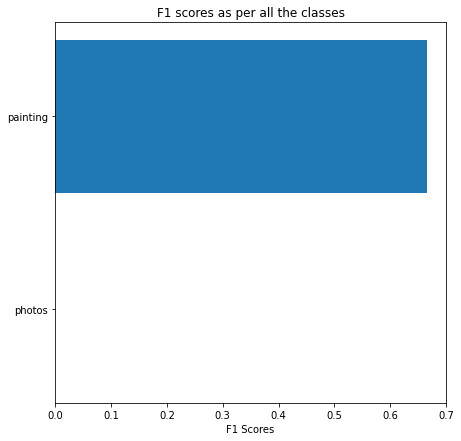

In [91]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-scores"].values)# get f1 score values

ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1 Scores")
ax.set_title("F1 scores as per all the classes")
ax.invert_yaxis();


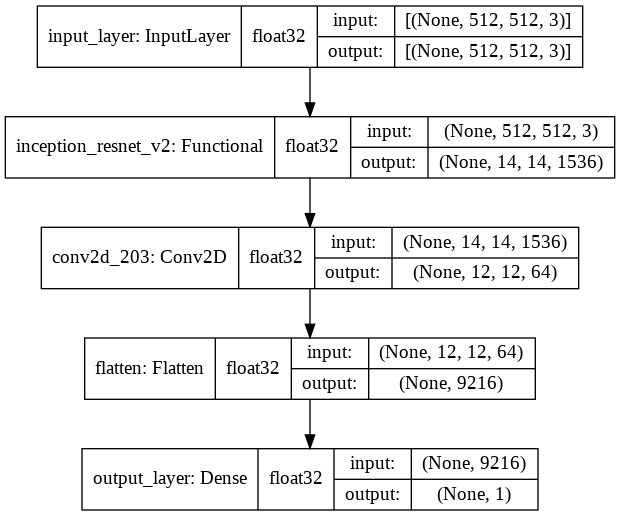

In [92]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None
)